# **Introduction**

Coral reefs are vital for marine biodiversity, supporting around 25% of all marine species and playing a critical role in coastal protection, fisheries support, and boosting tourist economies. However, they face severe threats from climate change, pollution, and other human activities, leading to phenomena like coral bleaching. Coral bleaching occurs when corals expel symbiotic algae that provide them with color and energy, turning them white and potentially leading to death if stress conditions persist.

Monitoring coral health is essential to preserve these ecosystems, yet traditional methods are laborious and have limited scope. Machine learning-driven image classification algorithms offer a solution by automatically distinguishing between bleached and healthy corals in underwater images. These tools can swiftly and accurately analyze large amounts of data, enabling more effective and large-scale monitoring of reef health. Hence, my interest in this topic. This technological advancement is crucial for safeguarding coral reefs and ensuring the survival of the diverse marine life they sustain.

In [1]:
!pip install tensorflow opencv-python matplotlib numpy

In [3]:
#IMPORTING DEPENDENCIES AND DRIVE
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import imghdr
from google.colab import drive
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#RUTES CREATION
ruta_corales = "/content/drive/My Drive/Corales"
blanqueados = 'bleached_corals'
saludables = 'healthy_corals'
ruta_aumentados = "/content/drive/My Drive/Corales_aug"
aug_sal = "bleached_augmented"
aug_blanq = "healthy_augmented"

In [5]:
#SAVING IMAGES TO A LIST
img_blanqueados = []
img_saludables = []

def get_image_files(carpeta, clase, lista):
  for archivo in os.listdir(os.path.join(carpeta,clase)):
      if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
          img_ruta = os.path.join(os.path.join(carpeta, clase), archivo)
          img = cv2.imread(img_ruta)
          if img is not None:
              lista.append(img)

In [6]:
get_image_files(ruta_corales, blanqueados, img_blanqueados)
get_image_files(ruta_corales, saludables, img_saludables)

array([[[149, 149, 149],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [162, 153, 149],
        [158, 149, 146],
        [158, 149, 146]],

       [[155, 155, 155],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [154, 145, 141],
        [139, 130, 127],
        [148, 139, 136]],

       [[152, 154, 154],
        [145, 147, 147],
        [141, 143, 143],
        ...,
        [142, 135, 132],
        [122, 115, 112],
        [141, 134, 131]],

       ...,

       [[149, 145, 144],
        [145, 141, 140],
        [152, 148, 147],
        ...,
        [113, 101, 101],
        [116, 100, 101],
        [113,  97,  98]],

       [[148, 144, 143],
        [146, 142, 141],
        [151, 147, 146],
        ...,
        [116, 102, 103],
        [120, 104, 105],
        [120, 102, 103]],

       [[139, 135, 134],
        [143, 139, 138],
        [139, 135, 134],
        ...,
        [115, 101, 102],
        [111,  96,  94],
        [112,  94,  93]]], dtype=uint8)
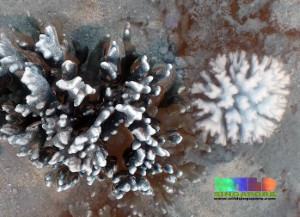

In [7]:
#GENERATING VISUALIZATION
img_blanqueados[0]

array([[[239, 233, 162],
        [243, 237, 166],
        [248, 244, 173],
        ...,
        [255, 248, 169],
        [249, 242, 163],
        [245, 238, 159]],

       [[237, 230, 157],
        [237, 231, 158],
        [240, 234, 161],
        ...,
        [229, 222, 143],
        [227, 217, 139],
        [222, 215, 136]],

       [[240, 231, 157],
        [239, 230, 156],
        [241, 232, 158],
        ...,
        [226, 216, 138],
        [226, 214, 136],
        [224, 214, 136]],

       ...,

       [[145, 157, 167],
        [135, 150, 159],
        [134, 149, 158],
        ...,
        [ 85, 130, 181],
        [105, 148, 197],
        [136, 177, 226]],

       [[123, 131, 144],
        [136, 145, 158],
        [125, 134, 147],
        ...,
        [110, 150, 199],
        [104, 144, 196],
        [101, 141, 193]],

       [[115, 128, 142],
        [112, 123, 137],
        [113, 119, 138],
        ...,
        [ 88, 118, 165],
        [ 65,  95, 150],
        [ 93, 121, 181]]], dtype=uint8)
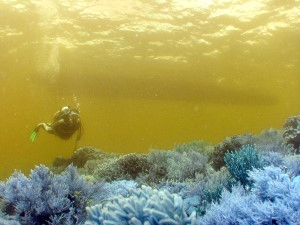

In [8]:
img_saludables[0]

In [9]:
# UPLOADING IMAGES INTO A DATAFRAME LIKE STRUCTURE
ds_not_aug= tf.keras.utils.image_dataset_from_directory(ruta_corales, image_size=(250,250), batch_size=20, shuffle=True)
iter_1 = ds_not_aug.as_numpy_iterator()
bache= iter_1.next()

Found 923 files belonging to 2 classes.


In [10]:
#DIMENSINALITY VERIFICATION
bache[0].shape

(20, 250, 250, 3)

In [11]:
#LABELS VERIFICATION
bache[1]

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
      dtype=int32)

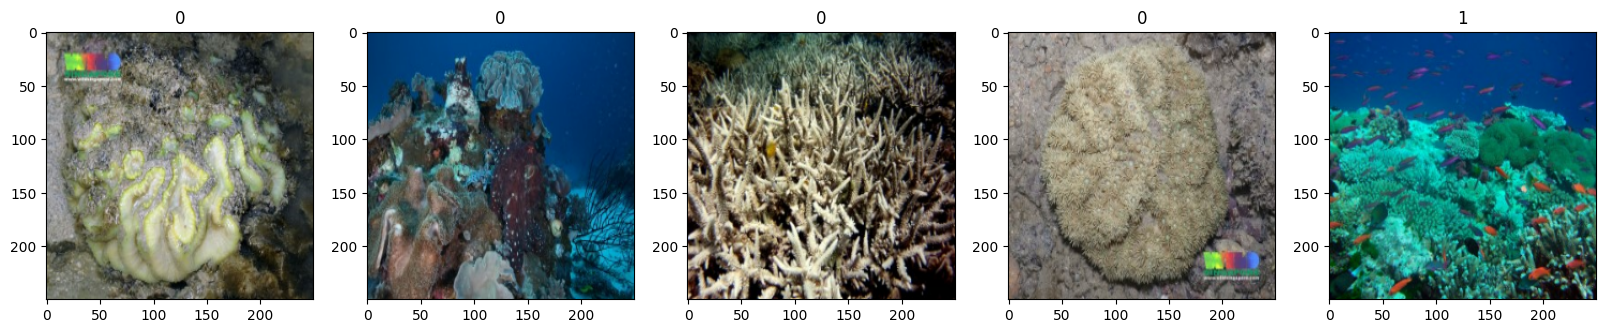

In [12]:
#IMAGES VISUALIZATION AND IT´S CORRESPONDING LABEL
fig,ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(bache[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(bache[1][idx])

In [16]:
#IMAGE NORMALIZATION
ds_NA_escalado = ds_not_aug.map(lambda x,y: (x/255,y))
test_baches=ds_NA_escalado.as_numpy_iterator().next()[0]
test_baches.max()

1.0

In [17]:
#CREATING DATA SEGMENTATION INTO 3 SUBSETS TRAINING, VALIDATION AND TESTING
trn = int(len(ds_NA_escalado)*0.7)
val = int(len(ds_NA_escalado)*0.2)+1
tst = int(len(ds_NA_escalado)*0.1)+1
trn_NA = ds_NA_escalado.take(trn)
val_NA = ds_NA_escalado.skip(trn).take(val)
tst_NA = ds_NA_escalado.skip(trn+val).take(tst)

In [18]:
#IMPORTING DEPENDENCIES TO CREATE A CONVOLUTIONAL NEURAL NETWORK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [19]:
#CREATION OF THE NEURAL NETWORK ARCHITECTURE
red_conv_NA = Sequential()
red_conv_NA.add(Conv2D(30, (3,3), 1, activation='relu', input_shape=(250,250,3)))
red_conv_NA.add(MaxPooling2D())
red_conv_NA.add(Dropout(0.3))
red_conv_NA.add(Conv2D(45, (3,3), 1, activation='relu'))
red_conv_NA.add(MaxPooling2D())
red_conv_NA.add(Dropout(0.2))
red_conv_NA.add(Conv2D(30, (3,3), 1, activation='relu'))
red_conv_NA.add(MaxPooling2D())
red_conv_NA.add(Flatten())
red_conv_NA.add(Dense(250, activation='relu'))
red_conv_NA.add(Dropout(0.5))
red_conv_NA.add(Dense(1, activation='sigmoid'))

In [20]:
#MODEL COMPILATION
red_conv_NA.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
#LAYERS STRUCTURE AND NUMBER OF PARAMETERS
red_conv_NA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 30)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 124, 124, 30)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 45)      12195     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 45)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 45)        0

In [22]:
#MODEL TRAINING
historial_NA = red_conv_NA.fit(trn_NA, epochs=20, validation_data=val_NA)

Epoch 1/20
32/32 [==============================] - 87s 3s/step - loss: 1.0820 - accuracy: 0.6016 - val_loss: 0.6731 - val_accuracy: 0.6550
Epoch 2/20
32/32 [==============================] - 81s 3s/step - loss: 0.6414 - accuracy: 0.6766 - val_loss: 0.6675 - val_accuracy: 0.5700
Epoch 3/20
32/32 [==============================] - 78s 2s/step - loss: 0.5795 - accuracy: 0.7000 - val_loss: 0.6232 - val_accuracy: 0.6900
Epoch 4/20
32/32 [==============================] - 77s 2s/step - loss: 0.5717 - accuracy: 0.6984 - val_loss: 0.5826 - val_accuracy: 0.6950
Epoch 5/20
32/32 [==============================] - 77s 2s/step - loss: 0.5646 - accuracy: 0.7250 - val_loss: 0.6091 - val_accuracy: 0.7000
Epoch 6/20
32/32 [==============================] - 74s 2s/step - loss: 0.5610 - accuracy: 0.7094 - val_loss: 0.5768 - val_accuracy: 0.6900
Epoch 7/20
32/32 [==============================] - 82s 3s/step - loss: 0.5513 - accuracy: 0.7000 - val_loss: 0.5784 - val_accuracy: 0.6950
Epoch 8/20
32/32 [==

# **Generation of Curves**

With the accuracy and loss graphs, it can be verified if the model starts to overfit. If overfitting occurs, the model would begin to struggle with generalization and thus fail to capture the relationships existing in reality. A good training process is characterized by a similar decline in both curves for loss and a similar rise in the accuracy curve.

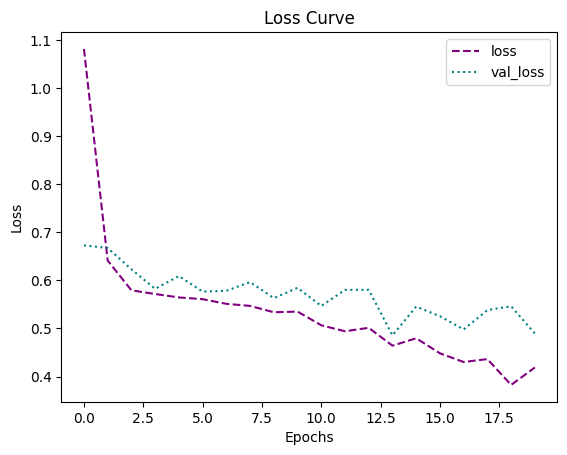

In [24]:
#LOSS CURVE VISUALIZATION
fig = plt.figure()
plt.plot(historial_NA.history['loss'], color='purple', label='loss', ls = "--")
plt.plot(historial_NA.history['val_loss'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

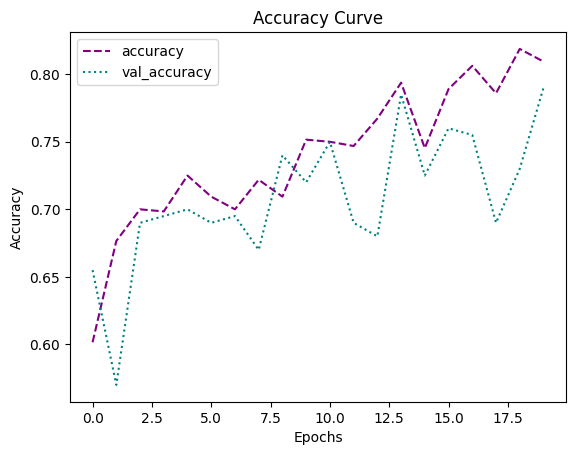

In [26]:
#ACCURACY VISUALIZATION
fig = plt.figure()
plt.plot(historial_NA.history['accuracy'], color='purple', label='accuracy', ls = "--")
plt.plot(historial_NA.history['val_accuracy'], color='teal', label='val_accuracy', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [27]:
#COMPUTATION OF PERFORMANCE METRICS AND GENERATION OF PREDICTIONS
Prec_NA= Precision()
Rec_NA = Recall()
Acc_NA = BinaryAccuracy()
for bache in tst_NA.as_numpy_iterator():
  X, y = bache[0], bache[1]
  y_pred = red_conv_NA.predict(X)
  Prec_NA.update_state(y, y_pred)
  Rec_NA.update_state(y, y_pred)
  Acc_NA.update_state(y, y_pred)

1/1 [==============================] - 0s 78ms/step


In [28]:
#VALUES PER EACH METRIC
print(Prec_NA.result().numpy(), Rec_NA.result().numpy(), Acc_NA.result().numpy())

0.74 0.88095236 0.78313255


In [29]:
#PARAMETERS GENERATION FOR DATA AUGMENTATION
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
#CREATING DATA AUGMENTATION FUNCTION
def aumentador(origen, clase, destino, estado, aumento):
        for archivo in os.listdir(os.path.join(origen, clase)):
                    img_ruta = os.path.join(os.path.join(origen, clase), archivo)
                    img = cv2.imread(img_ruta)
                    if img is not None:
                        original_img_ruta_aug = os.path.join(os.path.join(destino,estado), archivo)
                        cv2.imwrite(original_img_ruta_aug, img)

                        x = img_to_array(img)
                        x = np.expand_dims(x, axis=0)

                        i = 0
                        for batch in datagen.flow(x, batch_size=1, save_to_dir=os.path.join(destino,estado), save_prefix=clase, save_format='jpg'):
                            i += 1
                            if i >= aumento:
                                break

In [31]:
#GENERATING DATA AUGMENTATION
aumentador(ruta_corales, saludables, ruta_aumentados, aug_sal, 1)
aumentador(ruta_corales, blanqueados, ruta_aumentados, aug_blanq, 1)

In [13]:
#VISUALIZATION OF THE NUMBER OF AUGMENTED IMAGES IN HEALTHY CORALS
num_aug_sal = len([f for f in os.listdir(os.path.join(ruta_aumentados, aug_sal))])
num_arch_sal = len([f for f in os.listdir(os.path.join(ruta_corales,saludables))])
print(f"number of agumented images:{num_aug_sal}, number of Not augmented images:{num_arch_sal}")

number of agumented images:868, number of Not augmented images:438


In [14]:
#VISUALIZATION OF THE NUMBER OF AUGMENTED IMAGES IN BLEACHED CORALS
num_aug_bl = len([f for f in os.listdir(os.path.join(ruta_aumentados, aug_blanq))])
num_arch_bl = len([f for f in os.listdir(os.path.join(ruta_corales,blanqueados))])
print(f"number of agumented images:{num_aug_bl}, number of Not augmented images:{num_arch_bl}")

number of agumented images:957, number of Not augmented images:485


In [15]:
#VISUALIZATION OF THE NUMBER OF AUGMENTED IMAGES IN CORALS
ds = tf.keras.utils.image_dataset_from_directory(ruta_aumentados, image_size=(250,250), batch_size=20, shuffle=True)
iter = ds.as_numpy_iterator()
bache= iter.next()

Found 1825 files belonging to 2 classes.


In [16]:
bache[0].shape

(20, 250, 250, 3)

In [17]:
bache[1]

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
      dtype=int32)

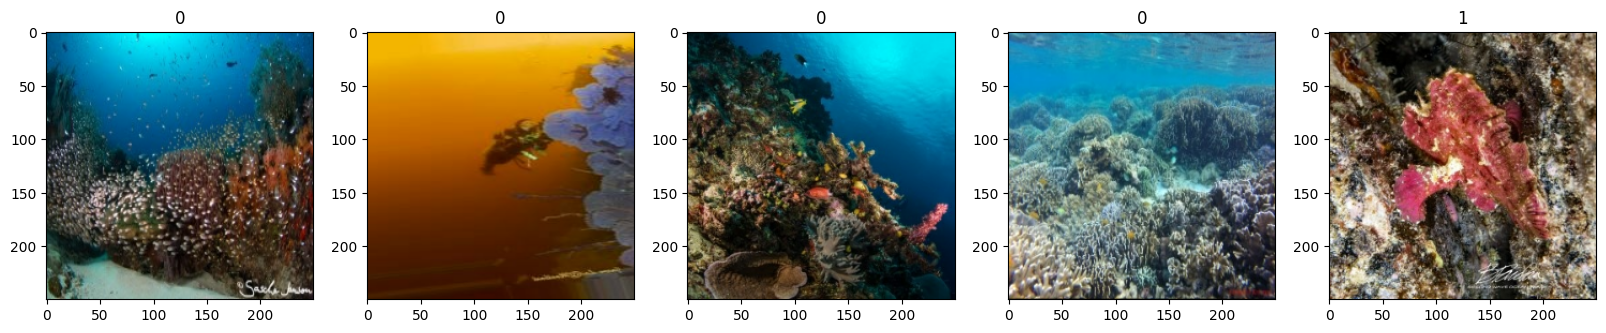

In [18]:
#VISUALIZATION OF AUGMENTED DATA
fig,ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(bache[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(bache[1][idx])

In the next section i will reapeat some steps of the preprocessing shown

In [19]:
ds_escalado = ds.map(lambda x,y: (x/255,y))
test_baches=ds_escalado.as_numpy_iterator().next()[0]
test_baches.max()

1.0

In [20]:
trn = int(len(ds_escalado)*0.7)
val = int(len(ds_escalado)*0.2)+1
tst = int(len(ds_escalado)*0.1)+1
trn_ds = ds_escalado.take(trn)
val_ds = ds_escalado.skip(trn).take(val)
tst_ds = ds_escalado.skip(trn+val).take(tst)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
red_conv = Sequential()
red_conv.add(Conv2D(30, (3,3), 1, activation='relu', input_shape=(250,250,3)))
red_conv.add(MaxPooling2D())
red_conv.add(Dropout(0.3))
red_conv.add(Conv2D(45, (3,3), 1, activation='relu'))
red_conv.add(MaxPooling2D())
red_conv.add(Dropout(0.2))
red_conv.add(Conv2D(30, (3,3), 1, activation='relu'))
red_conv.add(MaxPooling2D())
red_conv.add(Flatten())
red_conv.add(Dense(250, activation='relu'))
red_conv.add(Dropout(0.5))
red_conv.add(Dense(1, activation='sigmoid'))

In [23]:
red_conv.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
red_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 30)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 124, 124, 30)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 45)      12195     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 45)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 45)        0

In [26]:
historial = red_conv.fit(trn_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
64/64 [==============================] - 162s 2s/step - loss: 0.7618 - accuracy: 0.5539 - val_loss: 0.6503 - val_accuracy: 0.5895
Epoch 2/20
64/64 [==============================] - 163s 3s/step - loss: 0.6451 - accuracy: 0.6313 - val_loss: 0.6589 - val_accuracy: 0.5868
Epoch 3/20
64/64 [==============================] - 158s 2s/step - loss: 0.6348 - accuracy: 0.6320 - val_loss: 0.6413 - val_accuracy: 0.6579
Epoch 4/20
64/64 [==============================] - 172s 3s/step - loss: 0.6043 - accuracy: 0.6711 - val_loss: 0.5963 - val_accuracy: 0.6632
Epoch 5/20
64/64 [==============================] - 157s 2s/step - loss: 0.5714 - accuracy: 0.7039 - val_loss: 0.5822 - val_accuracy: 0.7000
Epoch 6/20
64/64 [==============================] - 147s 2s/step - loss: 0.5643 - accuracy: 0.7055 - val_loss: 0.6219 - val_accuracy: 0.6868
Epoch 7/20
64/64 [==============================] - 154s 2s/step - loss: 0.5741 - accuracy: 0.7047 - val_loss: 0.5811 - val_accuracy: 0.6921
Epoch 8/20
64

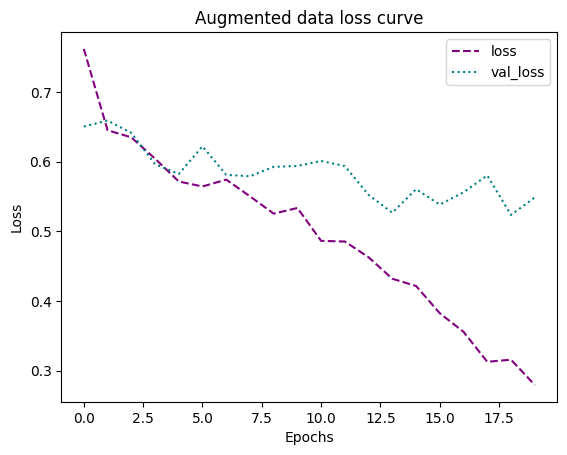

In [29]:
fig = plt.figure()
plt.plot(historial.history['loss'], color='purple', label='loss', ls = "--")
plt.plot(historial.history['val_loss'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Augmented data loss curve')
plt.legend()
plt.show()

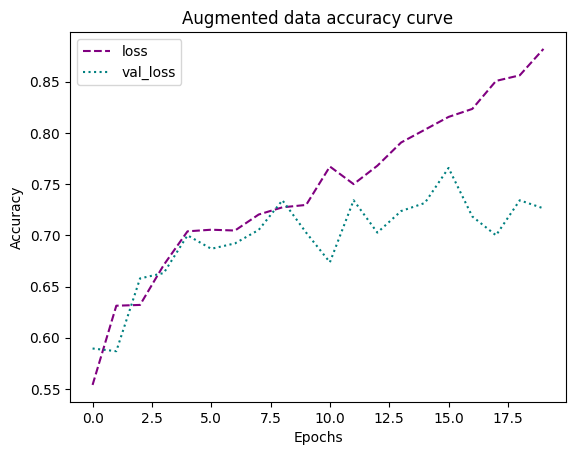

In [30]:
fig = plt.figure()
plt.plot(historial.history['accuracy'], color='purple', label='loss', ls = "--")
plt.plot(historial.history['val_accuracy'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Augmented data accuracy curve')
plt.legend()
plt.show()

# Overfitting

in the second model created, it can be crealy seen that the validation curve does not follow the training curve, in both graphs as it is seen, around epoch 15 the validation line starts to deviate from the traning line

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
Prec= Precision()
Rec = Recall()
Acc = BinaryAccuracy()
for bache in tst_ds.as_numpy_iterator():
  X, y = bache[0], bache[1]
  y_pred = red_conv.predict(X)
  Prec.update_state(y, y_pred)
  Rec.update_state(y, y_pred)
  Acc.update_state(y, y_pred)

1/1 [==============================] - 0s 114ms/step


In [33]:
print(Prec.result().numpy(), Rec.result().numpy(), Acc.result().numpy())

0.7195122 0.68604654 0.6969697


# Analysis of Binary Prediction Model Metrics

To determine which model is better, we must consider all the metrics, as each provides a different perspective on the model's performance:

**Precision**: It is the proportion of true positives over the total positive predictions. High precision means the model has few false positives.
**Recall (sensitivity)**: It is the proportion of true positives over the total actual positive cases. High recall indicates the model has few false negatives.

**Binary Accuracy**: It is the proportion of correct predictions (both positive and negative) over the total predictions.

## Model Comparison

Model without data augmentation:
**Precision**: 0.74
**Recall**: 0.88
**Binary Accuracy**: 0.78

Model with data augmentation:
**Precision**: 0.72
**Recall**: 0.69
**Binary Accuracy**: 0.70

## Analysis:
**Precision**: Both models have almosr the same precision . This means that when predicting a positive case, both models have equivalent proportion of true positives.

**Recall**: The recall is significantly higher in Model without augmentation (0.88) compared to Model 2 (0.69). This indicates that Model 1 is better at identifying positive cases, which is important in problems where minimizing false negatives is crucial (e.g., disease detection).

**Binary Accuracy**: The binary accuracy is also higher in Model without augmentation of the data (0.78) compared to with augmentation (0.70). This means that Model 1 has a higher proportion of correct predictions overall.

## **Conclusion**:
The Model without augmentation is superior because it has better recall, better binary accuracy and is not overfitted, indicating a more balanced and robust performance in correctly identifying both bleached and healthy corals, making it more suitable for a deployment test if it reaches the tresholdof interest.

